Matplotlib is building the font cache; this may take a moment.


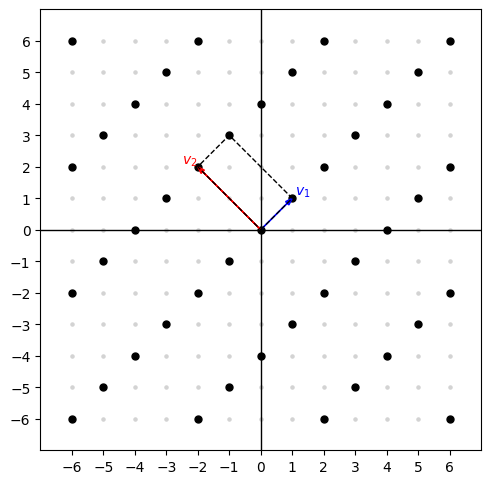

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# basis vectors
v1 = np.array([1, 1])
v2 = np.array([-2, 2])

# plotting window
XMIN, XMAX = -6, 6
YMIN, YMAX = -6, 6

fig, ax = plt.subplots(figsize=(5, 5))

# 1. full integer lattice in light gray
for x in range(XMIN, XMAX + 1):
    for y in range(YMIN, YMAX + 1):
        ax.scatter(x, y, s=5, color='lightgray')

# 2. sublattice points: m v1 + n v2
lattice_points = set()
for m in range(-6, 7):
    for n in range(-6, 7):
        p = m * v1 + n * v2
        x, y = p
        if XMIN <= x <= XMAX and YMIN <= y <= YMAX:
            lattice_points.add((x, y))

for x, y in lattice_points:
    ax.scatter(x, y, s=25, color='black')

# 3. axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# 4. basis vectors
ax.arrow(0, 0, v1[0], v1[1],
         head_width=0.15, length_includes_head=True, color='blue')
ax.text(1.1, 1.1, r'$v_1$', color='blue')

ax.arrow(0, 0, v2[0], v2[1],
         head_width=0.15, length_includes_head=True, color='red')
ax.text(-2.5, 2.1, r'$v_2$', color='red')

# 5. fundamental parallelogram: 0, v1, v1+v2, v2
P = [np.array([0, 0]), v1, v1 + v2, v2, np.array([0, 0])]
xs = [p[0] for p in P]
ys = [p[1] for p in P]
ax.plot(xs, ys, 'k--', linewidth=1)

# final formatting
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(XMIN - 1, XMAX + 1)
ax.set_ylim(YMIN - 1, YMAX + 1)
ax.set_xticks(range(XMIN, XMAX + 1))
ax.set_yticks(range(YMIN, YMAX + 1))

plt.tight_layout()
# optional: save to file for LaTeX
# plt.savefig("lattice_example.pdf")
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# basis vectors
v1 = np.array([1, 1])
v2 = np.array([-2, 2])

# plotting window
XMIN, XMAX = -6, 6
YMIN, YMAX = -6, 6

fig, ax = plt.subplots(figsize=(5, 5))

# 1. full integer lattice in light gray
for x in range(XMIN, XMAX + 1):
    for y in range(YMIN, YMAX + 1):
        ax.scatter(x, y, s=5, color='lightgray')

# 2. sublattice points: m v1 + n v2
lattice_points = set()
for m in range(-6, 7):
    for n in range(-6, 7):
        p = m * v1 + n * v2
        x, y = p
        if XMIN <= x <= XMAX and YMIN <= y <= YMAX:
            lattice_points.add((x, y))

for x, y in lattice_points:
    ax.scatter(x, y, s=25, color='black')

# 3. axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# 4. basis vectors
ax.arrow(0, 0, v1[0], v1[1],
         head_width=0.15, length_includes_head=True, color='blue')
ax.text(1.1, 1.1, r'$v_1$', color='blue')

ax.arrow(0, 0, v2[0], v2[1],
         head_width=0.15, length_includes_head=True, color='red')
ax.text(-2.5, 2.1, r'$v_2$', color='red')

# 5. fundamental parallelogram: 0, v1, v1+v2, v2
P = [np.array([0, 0]), v1, v1 + v2, v2, np.array([0, 0])]
xs = [p[0] for p in P]
ys = [p[1] for p in P]
ax.plot(xs, ys, 'k--', linewidth=1)

# final formatting
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(XMIN - 1, XMAX + 1)
ax.set_ylim(YMIN - 1, YMAX + 1)
ax.set_xticks(range(XMIN, XMAX + 1))
ax.set_yticks(range(YMIN, YMAX + 1))

plt.tight_layout()
# optional: save to file for LaTeX
# plt.savefig("lattice_example.pdf")
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
from numba import njit
import numpy as np

@njit(cache=True, fastmath=True)
def search():
    """
    Integer search for triples (a,b,c), (x,y,z), (f,g,h) in [-4,4]^3
    satisfying the mixed bilinear system:
        2x·f + x + 2y·g + y + z·h = -1
        2a·x + 2b·y + c·z = 0
        2a·f + a + 2b·g + b + c·h = -1

    Each valid configuration is tested against an inequality region
    parameterized by:
        p = 2a² + 2b² + c²
        q = 2f² + 2f + 2g² + 2g + h² + 2
        r = 2x² + 2y² + z²

    The code records all solutions satisfying these constraints
    into an array of rows:
        [1, a, b, c, x, y, z, f, g, h, p, q, r]
    """

    # Allocate a buffer for up to 1 million results
    max_results = 1_000_000
    results = np.empty((max_results, 13), dtype=np.int64)

    # Integer domain [-4, 4] and precomputed squares
    r = np.arange(-4, 5, dtype=np.int64)
    squares = np.array([x * x for x in r], dtype=np.int64)
    count = 0

    # Enumerate all integer triples (x,y,z)
    for xi in range(len(r)):
        x, x2 = r[xi], squares[xi]
        for yi in range(len(r)):
            y, y2 = r[yi], squares[yi]
            for zi in range(len(r)):
                z, z2 = r[zi], squares[zi]

                # Enumerate all triples (f,g,h)
                for fi in range(len(r)):
                    f, f2 = r[fi], squares[fi]
                    for gi in range(len(r)):
                        g, g2 = r[gi], squares[gi]
                        for hi in range(len(r)):
                            h, h2 = r[hi], squares[hi]

                            # Mixed bilinear constraint #1
                            # This links (x,y,z) and (f,g,h)
                            if 2 * x * f + x + 2 * y * g + y + z * h != -1:
                                continue

                            # Enumerate all triples (a,b,c)
                            for ai in range(len(r)):
                                a, a2 = r[ai], squares[ai]
                                for bi in range(len(r)):
                                    b, b2 = r[bi], squares[bi]
                                    for ci in range(len(r)):
                                        c, c2 = r[ci], squares[ci]

                                        # Bilinear constraint #2
                                        # (a,b,c) ⟂ (x,y,z) with specific scaling
                                        if 2 * a * x + 2 * b * y + c * z != 0:
                                            continue

                                        # Bilinear constraint #3
                                        # Coupling between (a,b,c) and (f,g,h)
                                        if 2 * a * f + a + 2 * b * g + b + c * h != -1:
                                            continue

                                        # Compute the derived invariants p,q,r
                                        p_val = 2 * a2 + 2 * b2 + c2
                                        q_val = 2 * f2 + 2 * f + 2 * g2 + 2 * g + h2 + 2
                                        r_val = 2 * x2 + 2 * y2 + z2

                                        # Evaluate the inequality region in (p,q,r)
                                        valid = False
                                        if p_val <= -257:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True
                                        elif -256 <= p_val <= -1:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                q_val == (1 - p_val) / p_val or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True
                                        elif p_val == 0:
                                            # Degenerate (p=0) case
                                            if r_val >= -256:
                                                valid = True
                                        elif p_val >= 1:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                q_val == (1 - p_val) / p_val or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True

                                        # Store valid results up to max_results
                                        if valid and count < max_results:
                                            results[count, :] = (
                                                1,          # family tag (source)
                                                a, b, c,    # first triple
                                                x, y, z,    # second triple
                                                f, g, h,    # third triple
                                                p_val, q_val, r_val
                                            )
                                            count += 1

    # Return the truncated array of valid results
    return results[:count]


# Run the search and report count
valid_solutions1 = search()
print(f"Total valid solutions: {len(valid_solutions1)}")

Total valid solutions: 1240


In [2]:
from numba import njit
import numpy as np

@njit(cache=True, fastmath=True)
def search():
    """
    Integer search for triples (a,b,c), (x,y,z), (f,g,h) in [-4,4]^3
    satisfying the mixed bilinear system:
        2x·f + x + 2y·g + y + z·h = -1
        2a·x + 2b·y + c·z = 0
        2a·f + a + 2b·g + b + c·h = -1

    Each valid configuration is tested against an inequality region
    parameterized by:
        p = 2a² + 2b² + c²
        q = 2f² + 2f + 2g² + 2g + h² + 2
        r = 2x² + 2y² + z²

    The code records all solutions satisfying these constraints
    into an array of rows:
        [1, a, b, c, x, y, z, f, g, h, p, q, r]
    """

    # Allocate a buffer for up to 1 million results
    max_results = 1_000_000
    results = np.empty((max_results, 13), dtype=np.int64)

    # Integer domain [-4, 4] and precomputed squares
    r = np.arange(-4, 5, dtype=np.int64)
    squares = np.array([x * x for x in r], dtype=np.int64)
    count = 0

    # Enumerate all integer triples (x,y,z)
    for xi in range(len(r)):
        x, x2 = r[xi], squares[xi]
        for yi in range(len(r)):
            y, y2 = r[yi], squares[yi]
            for zi in range(len(r)):
                z, z2 = r[zi], squares[zi]

                # Enumerate all triples (f,g,h)
                for fi in range(len(r)):
                    f, f2 = r[fi], squares[fi]
                    for gi in range(len(r)):
                        g, g2 = r[gi], squares[gi]
                        for hi in range(len(r)):
                            h, h2 = r[hi], squares[hi]

                            # Mixed bilinear constraint #1
                            # This links (x,y,z) and (f,g,h)
                            if 2 * x * f + x + 2 * y * g + y + z * h != -1:
                                continue

                            # Enumerate all triples (a,b,c)
                            for ai in range(len(r)):
                                a, a2 = r[ai], squares[ai]
                                for bi in range(len(r)):
                                    b, b2 = r[bi], squares[bi]
                                    for ci in range(len(r)):
                                        c, c2 = r[ci], squares[ci]

                                        # Bilinear constraint #2
                                        # (a,b,c) ⟂ (x,y,z) with specific scaling
                                        if 2 * a * x + 2 * b * y + c * z != 0:
                                            continue

                                        # Bilinear constraint #3
                                        # Coupling between (a,b,c) and (f,g,h)
                                        if 2 * a * f + a + 2 * b * g + b + c * h != -1:
                                            continue

                                        # Compute the derived invariants p,q,r
                                        p_val = 2 * a2 + 2 * b2 + c2
                                        q_val = 2 * f2 + 2 * f + 2 * g2 + 2 * g + h2 + 2
                                        r_val = 2 * x2 + 2 * y2 + z2

                                        # Evaluate the inequality region in (p,q,r)
                                        valid = False
                                        if p_val <= -257:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True
                                        elif -256 <= p_val <= -1:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                q_val == (1 - p_val) / p_val or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True
                                        elif p_val == 0:
                                            # Degenerate (p=0) case
                                            if r_val >= -256:
                                                valid = True
                                        elif p_val >= 1:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                q_val == (1 - p_val) / p_val or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True

                                        # Store valid results up to max_results
                                        if valid and count < max_results:
                                            results[count, :] = (
                                                1,          # family tag (source)
                                                a, b, c,    # first triple
                                                x, y, z,    # second triple
                                                f, g, h,    # third triple
                                                p_val, q_val, r_val
                                            )
                                            count += 1

    # Return the truncated array of valid results
    return results[:count]


# Run the search and report count
valid_solutions1 = search()
print(f"Total valid solutions: {len(valid_solutions1)}")

Total valid solutions: 1240


In [3]:
from numba import njit
import numpy as np

@njit(cache=True, fastmath=True)
def search():
    """
    Exhaustive integer search for triples (x,y,z), (a,b,c), (f,g,h) in [-4,4]^3
    satisfying the linear constraints
        ⟨(x,y,z),(f,g,h)⟩ = 0,
        ⟨(a,b,c),(x,y,z)⟩ = -1,
        ⟨(a,b,c),(f,g,h)⟩ = -1,
    together with an inequality region expressed in terms of
        p = ||(x,y,z)||^2,
        q = 1 + ||(a,b,c)||^2,
        r = ||(f,g,h)||^2.
    Returns an array of rows
        [2, x, y, z, a, b, c, f, g, h, p, q, r].
    """
    max_results = 1_000_000
    results = np.empty((max_results, 13), dtype=np.int64)

    # Search range and precomputed squares
    r = np.arange(-4, 5, dtype=np.int64)
    squares = np.array([x * x for x in r], dtype=np.int64)
    count = 0

    # Loop over (x,y,z)
    for xi in range(len(r)):
        x, x2 = r[xi], squares[xi]
        for yi in range(len(r)):
            y, y2 = r[yi], squares[yi]
            for zi in range(len(r)):
                z, z2 = r[zi], squares[zi]

                # Loop over (f,g,h) with orthogonality to (x,y,z)
                for fi in range(len(r)):
                    f, f2 = r[fi], squares[fi]
                    for gi in range(len(r)):
                        g, g2 = r[gi], squares[gi]
                        for hi in range(len(r)):
                            h, h2 = r[hi], squares[hi]

                            # <(x,y,z),(f,g,h)> = 0
                            if x * f + y * g + z * h != 0:
                                continue

                            # Loop over (a,b,c) with two linear constraints
                            for ai in range(len(r)):
                                a, a2 = r[ai], squares[ai]
                                for bi in range(len(r)):
                                    b, b2 = r[bi], squares[bi]
                                    for ci in range(len(r)):
                                        c, c2 = r[ci], squares[ci]

                                        # <(a,b,c),(x,y,z)> = -1
                                        if a * x + b * y + c * z != -1:
                                            continue
                                        # <(a,b,c),(f,g,h)> = -1
                                        if a * f + b * g + c * h != -1:
                                            continue

                                        # Quadratic invariants
                                        p_val = x2 + y2 + z2
                                        q_val = 1 + a2 + b2 + c2
                                        r_val = f2 + g2 + h2

                                        # Inequality conditions defining the admissible region
                                        valid = False
                                        if p_val <= -257:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True
                                        elif -256 <= p_val <= -1:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                q_val == (1 - p_val) / p_val or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True
                                        elif p_val == 0:
                                            # Degenerate case p = 0: only a lower bound on r
                                            if r_val >= -256:
                                                valid = True
                                        elif p_val >= 1:
                                            if ((q_val < (1 - p_val) / p_val and 
                                                 r_val >= (256 + p_val) / (-1 + p_val + p_val * q_val)) or
                                                q_val == (1 - p_val) / p_val or
                                                (q_val > (1 - p_val) / p_val and 
                                                 r_val <= (256 + p_val) / (-1 + p_val + p_val * q_val))):
                                                valid = True

                                        # Record admissible configurations with a family tag = 2
                                        if valid and count < max_results:
                                            results[count, :] = (
                                                2,          # family/source tag
                                                x, y, z,
                                                a, b, c,
                                                f, g, h,
                                                p_val, q_val, r_val
                                            )
                                            count += 1

    return results[:count]


# Run and report
valid_solutions2 = search()
print(f"Total valid solutions: {len(valid_solutions2)}")

Total valid solutions: 4560


In [4]:
valid_solutions = np.vstack((valid_solutions1, valid_solutions2))

In [5]:
def filter_unique_pqr(solutions):
    """
    Remove duplicate solutions that share identical (p, q, r) triples.

    Parameters
    ----------
    solutions : array-like, shape (N, 13)
        Each row represents one valid solution from the search(), in the form:
        [source, a, b, c, x, y, z, f, g, h, p, q, r]

    Returns
    -------
    filtered : np.ndarray
        Array containing only the first occurrence of each distinct (p, q, r) triple.
    """
    seen_pqr = set()   # Keeps track of already-seen (p,q,r) combinations
    filtered = []

    for sol in solutions:
        # Extract p, q, r using their column indices (10, 11, 12)
        pqr = (sol[10], sol[11], sol[12])

        # Keep only the first instance of each unique triple
        if pqr not in seen_pqr:
            seen_pqr.add(pqr)
            filtered.append(sol)

    return np.array(filtered)


# Apply filtering and report number of unique (p,q,r) triples
unique_pqr_solutions = filter_unique_pqr(valid_solutions)
len(unique_pqr_solutions)

104

In [6]:
import numpy as np

def build_basis(sol):
    """
    Construct a 5×5 basis matrix for a lattice embedding,
    depending on whether the solution belongs to family/source 1 or 2.

    Parameters
    ----------
    sol : dict or sequence
        - If a dict, must include:
            {'source', 'x','y','z', 'a','b','c', 'f','g','h'}
        - If a list or tuple, it follows:
            [source, x, y, z, a, b, c, f, g, h]

    Returns
    -------
    basis : np.ndarray of shape (5,5)
        Each row v₁,...,v₅ defines one generator of the lattice basis.
    """

    # --- Unpack input depending on type ---
    if isinstance(sol, dict):
        source = sol['source']
        x, y, z = sol['x'], sol['y'], sol['z']
        a, b, c = sol['a'], sol['b'], sol['c']
        f, g, h = sol['f'], sol['g'], sol['h']
    else:
        # For arrays/lists from search() results
        source = sol[0]
        x, y, z = sol[1], sol[2], sol[3]
        a, b, c = sol[4], sol[5], sol[6]
        f, g, h = sol[7], sol[8], sol[9]

    # --- Construct basis vectors by family type ---
    if source == 1:
        # Family 1 embedding pattern
        # Includes alternating sign structure and shift between coordinate pairs
        v1 = np.array([1, -1, 0, 0, 0], dtype=np.float32)       
        v2 = np.array([0,  0, 1, -1, 0], dtype=np.float32)       
        v3 = np.array([f, f + 1, g, g + 1, h], dtype=np.float32) 
        v4 = np.array([x, x, y, y, z], dtype=np.float32)         
        v5 = np.array([a, a, b, b, c], dtype=np.float32)         

    elif source == 2:
        # Family 2 embedding pattern
        # Simpler linear span structure, based on parametrization in R⁵
        v1 = np.array([1, -1, 0, 0, 0], dtype=np.float32)        
        v2 = np.array([1,  1, 0, 0, 0], dtype=np.float32)        
        v3 = np.array([-1, 0, a, b, c], dtype=np.float32)        
        v4 = np.array([0,  0, f, g, h], dtype=np.float32)        
        v5 = np.array([0,  0, x, y, z], dtype=np.float32)        

    else:
        raise ValueError(f"Invalid source value: {source}")

    # Stack rows to form the 5×5 matrix
    return np.stack([v1, v2, v3, v4, v5])

In [7]:
import numpy as np

def wu_obstruction(basis):
    """
    Wu–type obstruction test for the given basis in H².

    Parameters
    ----------
    basis : np.ndarray, shape (5, n)
        Rows v₁, …, v₅ of the lattice basis (embedded in Rⁿ).

    Returns
    -------
    obstructed : bool
        True if the inequality
            ∑ k_i² > 4·n − 3·|{ i : k_i odd }|
        holds for k = v₁ + ⋯ + v₅, i.e. if the Wu-type inequality fails
        and hence obstructs the desired geometric configuration.
    """
    # Characteristic vector k = sum of basis vectors
    W = np.sum(basis, axis=0)
    k = W

    # Quadratic form value ⟨k,k⟩ in the standard Euclidean metric
    k_squared_sum = np.sum(k**2)

    # Indices of coordinates where k is odd
    Ro = [i for i, ki in enumerate(k) if ki % 2 == 1]

    lhs = k_squared_sum
    rhs = 4 * len(k) - 3 * len(Ro)

    # Obstructed if the inequality is violated in the "wrong" direction
    return lhs > rhs


def remove_wu_obstructed(solutions):
    """
    Filter out solutions whose associated basis fails the Wu inequality.

    Parameters
    ----------
    solutions : iterable
        Each element is either:
          - a dict accepted by build_basis, or
          - an array/tuple in the format accepted by build_basis.

    Returns
    -------
    filtered : list
        Subset of solutions whose bases do NOT trigger wu_obstruction.
    """
    filtered = []
    for sol in solutions:
        basis = build_basis(sol)
        if not wu_obstruction(basis):
            filtered.append(sol)
    return filtered


# Keep only solutions whose basis passes the Wu test (no obstruction).
wu_obstructed_solutions = remove_wu_obstructed(unique_pqr_solutions)

# Optional unpacking/check; this loop has no side effects other than validation.
for sol in wu_obstructed_solutions:
    if isinstance(sol, dict):
        x, y, z = sol['x'], sol['y'], sol['z']
        a, b, c = sol['a'], sol['b'], sol['c']
        f, g, h = sol['f'], sol['g'], sol['h']
    else:
        x, y, z = sol[1], sol[2], sol[3]
        a, b, c = sol[4], sol[5], sol[6]
        f, g, h = sol[7], sol[8], sol[9]

len(wu_obstructed_solutions)

61

In [8]:
import numpy as np

def is_full_rank(basis, tol=1e-10):
    """
    Numerical full-rank test for the lattice basis matrix.

    Parameters
    ----------
    basis : np.ndarray, shape (n, n)
        Basis matrix whose rows are the generators v₁,…,vₙ.
    tol : float
        Relative tolerance passed to np.linalg.matrix_rank.

    Returns
    -------
    bool
        True iff the row vectors are linearly independent
        (i.e. rank(basis) = n).
    """
    return np.linalg.matrix_rank(basis, tol=tol) == basis.shape[0]


def filter_full_rank_lattices(solutions):
    """
    Retain only those solutions whose associated lattice basis
    is of full rank.

    Parameters
    ----------
    solutions : iterable
        Collection of solutions; each element is accepted by build_basis.

    Returns
    -------
    list
        Subset of solutions with full-rank bases.
    """
    return [sol for sol in solutions if is_full_rank(build_basis(sol))]


def removed_full_rank(solutions):
    """
    Complement of filter_full_rank_lattices: collect solutions whose
    associated basis fails the full-rank condition.
    """
    return [sol for sol in solutions if not is_full_rank(build_basis(sol))]


# Apply the rank test to the Wu-unobstructed family
fullRankFiltered = filter_full_rank_lattices(wu_obstructed_solutions)
notFullRank     = removed_full_rank(wu_obstructed_solutions)

print(f"{len(fullRankFiltered)} out of {len(wu_obstructed_solutions)} are full-rank.")
print(f"{len(notFullRank)} are not full-rank")

59 out of 61 are full-rank.
2 are not full-rank


In [9]:
def reformat_to_dict(solutions):
    """
    Convert a numeric array/list of solutions into a list of dictionaries
    with descriptive field names.

    Parameters
    ----------
    solutions : array-like of shape (N, 13)
        Each row or element must follow the layout:
          [source, a, b, c, x, y, z, f, g, h, p, q, r]

    Returns
    -------
    formatted : list of dict
        Each dict entry has labeled fields for easy downstream access.
    """
    formatted = []
    for sol in solutions:
        formatted.append({
            'source': int(sol[0]),
            'a': int(sol[1]), 'b': int(sol[2]), 'c': int(sol[3]),
            'x': int(sol[4]), 'y': int(sol[5]), 'z': int(sol[6]),
            'f': int(sol[7]), 'g': int(sol[8]), 'h': int(sol[9]),
            'p': int(sol[10]), 'q': int(sol[11]), 'r': int(sol[12])
        })
    return formatted


# Reformat the surviving full-rank solutions for readability
pretty_solutions = reformat_to_dict(fullRankFiltered)

In [10]:
from numba import njit
import numpy as np

@njit
def generate_unit_cube(dim):
    """
    Vertices of the unit cube [0,1]^dim ⊂ R^dim, encoded as 0/1-vectors.
    """
    num_corners = 1 << dim          # 2^dim vertices
    cube = np.zeros((num_corners, dim), dtype=np.float32)
    for i in range(num_corners):
        for j in range(dim):
            cube[i, j] = (i >> j) & 1
    return cube


@njit
def is_cubiquitous_fast(basis, bound=3):
    """
    Cubiquity test on the box [-bound, bound]^5.

    Given a 5×5 basis matrix 'basis' (rows v₁,…,v₅), we check that every
    unit cube with integer lower-left corner in [-bound, bound]^5 contains
    at least one lattice point, up to a numerical tolerance determined by
    the condition number of the basis.

    Concretely, for each integer vector c in [-bound, bound]^5 and each
    corner u ∈ {0,1}^5, we solve
        basis^T · k ≈ c + u
    and test whether rounding k gives back c + u to within 'tol'.
    """
    dim = basis.shape[1]
    basis_T = basis.T                     # 5×5 matrix with columns vᵢ
    unit_cube = generate_unit_cube(dim)   # vertices of [0,1]^5

    # SVD-based estimate of condition number and scaling for tolerance
    u, s, vh = np.linalg.svd(basis_T)
    cond = s[0] / s[-1] if s[-1] > 0 else 1e10
    scale = max(np.linalg.norm(basis_T), 1.0)
    tol = cond * np.finfo(np.float32).eps * scale * 10  # safety factor

    # Enumerate integer corners of the ambient box
    for i0 in range(-bound, bound + 1):
        for i1 in range(-bound, bound + 1):
            for i2 in range(-bound, bound + 1):
                for i3 in range(-bound, bound + 1):
                    for i4 in range(-bound, bound + 1):
                        coord = np.array([i0, i1, i2, i3, i4], dtype=np.float32)
                        cube_passed = False

                        # For each unit cube [coord, coord+1]^5
                        for corner in unit_cube:
                            point = corner + coord

                            # Solve basis^T · k = point and round k to nearest lattice point
                            coeffs = np.linalg.solve(basis_T, point)
                            rounded = np.round(coeffs)
                            recon = basis_T @ rounded

                            # Accept if the reconstruction is within the numerical tolerance
                            if np.all(np.abs(recon - point) < tol):
                                cube_passed = True
                                break

                        # If some cube has no such lattice approximation, fail cubiquity
                        if not cube_passed:
                            return False

    return True


# --- Collect cubiquitous solutions ---

cubiquitous_solutions = []

for sol in pretty_solutions:
    # build_basis(sol) produces a 5×5 basis with rows v₁,…,v₅
    basis = build_basis(sol).astype(np.float32)
    if is_cubiquitous_fast(basis, bound=3):
        cubiquitous_solutions.append(sol)
        print("Cubiquitous:", sol)

print("Number of cubiquitous solutions:", len(cubiquitous_solutions))

Cubiquitous: {'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -2, 'f': -1, 'g': -1, 'h': 1, 'p': 2, 'q': 3, 'r': 6}
Cubiquitous: {'source': 1, 'a': -1, 'b': 0, 'c': 1, 'x': -1, 'y': 0, 'z': -2, 'f': 0, 'g': -1, 'h': 0, 'p': 3, 'q': 2, 'r': 6}
Cubiquitous: {'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -2, 'f': 0, 'g': -1, 'h': 0, 'p': 2, 'q': 2, 'r': 6}
Cubiquitous: {'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -1, 'f': -1, 'g': -1, 'h': 2, 'p': 2, 'q': 6, 'r': 3}
Cubiquitous: {'source': 1, 'a': -1, 'b': 0, 'c': 2, 'x': -1, 'y': 0, 'z': -1, 'f': 0, 'g': -1, 'h': 0, 'p': 6, 'q': 2, 'r': 3}
Cubiquitous: {'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -1, 'f': 0, 'g': -1, 'h': 0, 'p': 2, 'q': 2, 'r': 3}
Cubiquitous: {'source': 1, 'a': 0, 'b': 0, 'c': 1, 'x': -1, 'y': 0, 'z': 0, 'f': 0, 'g': -2, 'h': -1, 'p': 1, 'q': 7, 'r': 2}
Cubiquitous: {'source': 1, 'a': 0, 'b': -1, 'c': 1, 'x': -1, 'y': 0, 'z': 0, 'f': 0, 'g': -1, 'h': -2, 'p': 3, 'q'

In [11]:
def canonical_pqr(p, q, r):
    """
    Produce a canonical symmetry key for (p, q, r).

    The only symmetry allowed is the reflection (p, q, r) ↦ (r, q, p),
    corresponding to left–right interchange of the outer entries.
    If p == r, the configuration is symmetric, so its canonical key is
    obtained by sorting the pair (p, r) while keeping q fixed in the middle.
    """
    if p == r:
        return (min(p, r), q, max(p, r))
    return (p, q, r)


def filter_symmetric_solutions(solutions):
    """
    Remove duplicates under the (p, q, r) ↦ (r, q, p) symmetry.

    Parameters
    ----------
    solutions : list of dict
        Each solution dict must contain integer fields 'p', 'q', and 'r'.

    Returns
    -------
    list of dict
        Unique representatives modulo the symmetry above.
    """
    seen = set()
    unique = []
    for sol in solutions:
        p, q, r = int(sol['p']), int(sol['q']), int(sol['r'])
        key = canonical_pqr(p, q, r)
        if key not in seen:
            seen.add(key)
            unique.append(sol)
    return unique


# Apply the symmetry reduction
unique_cubiquitous_solutions = filter_symmetric_solutions(cubiquitous_solutions)

print(f"Unique cubiquitous solutions (modulo symmetry): {len(unique_cubiquitous_solutions)}")

for sol in unique_cubiquitous_solutions:
    print(sol)

Unique cubiquitous solutions (modulo symmetry): 22
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -2, 'f': -1, 'g': -1, 'h': 1, 'p': 2, 'q': 3, 'r': 6}
{'source': 1, 'a': -1, 'b': 0, 'c': 1, 'x': -1, 'y': 0, 'z': -2, 'f': 0, 'g': -1, 'h': 0, 'p': 3, 'q': 2, 'r': 6}
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -2, 'f': 0, 'g': -1, 'h': 0, 'p': 2, 'q': 2, 'r': 6}
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -1, 'f': -1, 'g': -1, 'h': 2, 'p': 2, 'q': 6, 'r': 3}
{'source': 1, 'a': -1, 'b': 0, 'c': 2, 'x': -1, 'y': 0, 'z': -1, 'f': 0, 'g': -1, 'h': 0, 'p': 6, 'q': 2, 'r': 3}
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -1, 'f': 0, 'g': -1, 'h': 0, 'p': 2, 'q': 2, 'r': 3}
{'source': 1, 'a': 0, 'b': 0, 'c': 1, 'x': -1, 'y': 0, 'z': 0, 'f': 0, 'g': -2, 'h': -1, 'p': 1, 'q': 7, 'r': 2}
{'source': 1, 'a': 0, 'b': -1, 'c': 1, 'x': -1, 'y': 0, 'z': 0, 'f': 0, 'g': -1, 'h': -2, 'p': 3, 'q': 6, 'r': 2}
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x

In [12]:
def filter_symmetric_and_small_lattices(solutions):
    """
    Filters cubiquitous lattice solutions by:
      (1) Removing duplicates under the (p,q,r) ↦ (r,q,p) symmetry.
      (2) Excluding lattices whose weights are too small:
            q < 4  or  p < 2  or  r < 2.

    Parameters
    ----------
    solutions : list of dict
        Each solution dict must contain integer fields 'p', 'q', and 'r'.

    Returns
    -------
    list of dict
        Symmetry-reduced and size-filtered solutions.
    """
    seen = set()
    unique = []

    for sol in solutions:
        p, q, r = int(sol['p']), int(sol['q']), int(sol['r'])

        # Skip lattices below the specified thresholds
        if p < 2 or r < 2:
            continue

        key = canonical_pqr(p, q, r)
        if key not in seen:
            seen.add(key)
            unique.append(sol)

    return unique


# Apply filtering
filtered = filter_symmetric_and_small_lattices(unique_cubiquitous_solutions)

print(f"Filtered unique solutions: {len(filtered)}")
for sol in filtered:
    print(sol)

Filtered unique solutions: 12
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -2, 'f': -1, 'g': -1, 'h': 1, 'p': 2, 'q': 3, 'r': 6}
{'source': 1, 'a': -1, 'b': 0, 'c': 1, 'x': -1, 'y': 0, 'z': -2, 'f': 0, 'g': -1, 'h': 0, 'p': 3, 'q': 2, 'r': 6}
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -2, 'f': 0, 'g': -1, 'h': 0, 'p': 2, 'q': 2, 'r': 6}
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -1, 'f': -1, 'g': -1, 'h': 2, 'p': 2, 'q': 6, 'r': 3}
{'source': 1, 'a': -1, 'b': 0, 'c': 2, 'x': -1, 'y': 0, 'z': -1, 'f': 0, 'g': -1, 'h': 0, 'p': 6, 'q': 2, 'r': 3}
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -1, 'f': 0, 'g': -1, 'h': 0, 'p': 2, 'q': 2, 'r': 3}
{'source': 1, 'a': 0, 'b': -1, 'c': 1, 'x': -1, 'y': 0, 'z': 0, 'f': 0, 'g': -1, 'h': -2, 'p': 3, 'q': 6, 'r': 2}
{'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': 0, 'f': 0, 'g': -1, 'h': -2, 'p': 2, 'q': 6, 'r': 2}
{'source': 1, 'a': 0, 'b': -1, 'c': 2, 'x': -1, 'y': 0, 'z': 

In [19]:
import numpy as np

def enumerate_lattices(solutions, decimals=5):
    """
    Enumerate all lattices from the given solutions.
    For each sol:
      - Construct its 6×6 basis matrix B with rows v₁,…,v₆.
      - Record det(B) > 0 (absolute value of determinant).
      - Compute squared norms and assign:
            a = ||v₃||², q = ||v₄||²,
            b = ||v₁||², s = ||v₅||²,
            c = ||v₂||², u = ||v₆||².
    """
    data = []
    for sol in solutions:
        B = build_basis(sol).astype(np.float64)
        det_val = abs(np.linalg.det(B))  # ensure positivity
        det = float(np.round(det_val, decimals))
        norms_sq = np.sum(B**2, axis=1)
        norms_sq = np.round(norms_sq, decimals)

        v1_sq, v2_sq, v3_sq, v4_sq, v5_sq = norms_sq
        a, b, c, d, e = float(v1_sq), float(v2_sq), float(v3_sq), float(v4_sq), float(v5_sq)

        data.append({
            "solution": sol,
            "basis": np.round(B, decimals),
            "det": det,
            "a": a, "b": b, "c": c, "d": d, "e": e
        })
    return data


# Example usage
lattice_data = enumerate_lattices(filtered, decimals=6)

for idx, L in enumerate(lattice_data):
    print(f"--- Lattice {idx} ---")
    print("parameters:", L["solution"])
    print("basis matrix (rows v1..v5):\n", L["basis"])
    print("det(B):", L["det"])
    print("a,b,c,d,e =", L["a"], L["b"], L["c"], L["d"], L["e"])
    print()

--- Lattice 0 ---
parameters: {'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -2, 'f': -1, 'g': -1, 'h': 1, 'p': 2, 'q': 3, 'r': 6}
basis matrix (rows v1..v5):
 [[ 1. -1.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.]
 [-1.  0. -1.  0.  1.]
 [-1. -1.  0.  0. -2.]
 [ 0.  0.  1.  1.  0.]]
det(B): 8.0
a,b,c,d,e = 2.0 2.0 3.0 6.0 2.0

--- Lattice 1 ---
parameters: {'source': 1, 'a': -1, 'b': 0, 'c': 1, 'x': -1, 'y': 0, 'z': -2, 'f': 0, 'g': -1, 'h': 0, 'p': 3, 'q': 2, 'r': 6}
basis matrix (rows v1..v5):
 [[ 1. -1.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.]
 [-1. -1.  0.  0. -2.]
 [-1. -1.  0.  0.  1.]]
det(B): 6.0
a,b,c,d,e = 2.0 2.0 2.0 6.0 3.0

--- Lattice 2 ---
parameters: {'source': 1, 'a': 0, 'b': 1, 'c': 0, 'x': -1, 'y': 0, 'z': -2, 'f': 0, 'g': -1, 'h': 0, 'p': 2, 'q': 2, 'r': 6}
basis matrix (rows v1..v5):
 [[ 1. -1.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.]
 [-1. -1.  0.  0. -2.]
 [ 0.  0.  1.  1.  0.]]
det(B): 4.0
a,b,c,d,e = 2.0 2.0 2.0 6.0 2.0


In [1]:
from itertools import product

def constraint_expr(p, q, r, s, t):
    """
    Polynomial constraint in the five weights (p,q,r,s,t):
        E(p,q,r,s,t) = -p r s - p r t - p s t - r s t + p q r s t.
    In the intended application this is proportional to the determinant
    (or discriminant) of the associated plumbing matrix.
    """
    return (
        -p * r * s 
        - p * r * t 
        - p * s * t 
        - r * s * t 
        + p * q * r * s * t
    )

def get_canonical_signature(p, q, r, s, t):
    """
    Canonical representative for the weight configuration.

    The central weight q is kept fixed, while the four outer legs
    {p, r, s, t} are unordered and sorted. This identifies configurations
    that differ only by permuting the outer arms.
    """
    outer = tuple(sorted([p, r, s, t]))
    return (q, outer)

# Search ranges for the five weights
q_range = range(4, 26)
p_range = range(2, 23)
r_range = range(2, 23)
s_range = range(2, 23)
t_range = range(2, 23)

canonical_signatures = set()  # to enforce uniqueness modulo outer symmetry
valid_tuples = []             # store (p,q,r,s,t, expr_val)

# Exhaustive search over the given ranges
for q in q_range:
    for p in p_range:
        for r in r_range:
            for s in s_range:
                for t in t_range:

                    total = p + q + r + s + t
                    # Global bound on total weight
                    if total > 32:
                        continue

                    expr_val = constraint_expr(p, q, r, s, t)

                    # Only keep tuples with determinant-like value in (0, 1024]
                    if 0 < expr_val <= 1024:
                        canon = get_canonical_signature(p, q, r, s, t)
                        # Avoid duplicates under permutation of outer legs
                        if canon not in canonical_signatures:
                            canonical_signatures.add(canon)
                            valid_tuples.append((p, q, r, s, t, expr_val))

# Output all distinct valid configurations
for p, q, r, s, t, expr_val in valid_tuples:
    total = p + q + r + s + t
print(len(valid_tuples))

745


In [13]:
# Assuming `valid_tuples` is the list from earlier with 7 elements per tuple (p, q, r, s, t, u, expr)
if not valid_tuples:
    print("No valid tuples found.")
else:
    max_p = max(t[0] for t in valid_tuples)
    max_q = max(t[1] for t in valid_tuples)
    max_r = max(t[2] for t in valid_tuples)
    max_s = max(t[3] for t in valid_tuples)
    max_t = max(t[4] for t in valid_tuples)

    print(f"Maximum values seen across valid tuples:")
    print(f"p: {max_p}, q: {max_q}, r: {max_r}, s: {max_s}, t: {max_t}")

Maximum values seen across valid tuples:
p: 4, q: 24, r: 5, s: 9, t: 22


In [48]:
def remove_adjacent_2x2_blocks(valid_tuples):
    filtered = []
    for tup in valid_tuples:
        p, q, r, s, t, expr = tup
        legs = [p, r, s, t]
        # Reject if any adjacent leg pair == (2, 2), modulo wraparound
        if not any(legs[i] == 2 and legs[(i + 1) % 4] == 2 for i in range(4)):
            filtered.append(tup)
    return filtered

# Apply filter
filtered_tuples = remove_adjacent_2x2_blocks(valid_tuples)
len(filtered_tuples)

In [50]:
import math

def is_perfect_square(n: int) -> bool:
    root = math.isqrt(n)
    return root * root == n

def filter_perfect_square_determinants(tuples):
    return [tup for tup in tuples if is_perfect_square(tup[5])]
square_determinant_tuples = filter_perfect_square_determinants(filtered_tuples)
square_determinant_tuples

[(2, 4, 3, 3, 9, 441),
 (2, 4, 3, 3, 18, 900),
 (2, 4, 3, 4, 4, 256),
 (2, 4, 3, 4, 10, 676),
 (2, 4, 4, 4, 11, 1024),
 (3, 5, 3, 3, 7, 729),
 (4, 5, 4, 4, 4, 1024),
 (3, 8, 3, 3, 4, 729),
 (2, 12, 3, 4, 4, 1024),
 (2, 15, 3, 3, 3, 729)]

In [34]:
from numba import njit
import numpy as np

@njit(cache=True, fastmath=True)
def solve_X_plumbing_numba(max_results=1_000_000, lo=-3, hi=3):
    """
    Integer search for X–plumbing data.

    Output rows have length 21 and are of the form:
        [a1..a4, b1..b4, c1..c4, d1..d4, p, q, r, t, s]

    where:
      - a = (a1..a4), b = (b1..b4), c = (c1..c4), d = (d1..d4) ∈ [lo,hi]^4
        satisfy the imposed bilinear constraints,
      - p, q, r, t, s are the squared norms (weights) of the corresponding
        embedded vectors in R^5 with parametrization
           v = (u0, u1, u0+u1, u2, u3),
        and here s is fixed to 3.
    """
    # Search range for all integer coordinates
    rvals = np.arange(lo, hi + 1, dtype=np.int64)

    # Preallocated buffer for results
    out = np.empty((max_results, 21), dtype=np.int64)
    cnt = 0

    def solve2(a11, a12, a21, a22, b1, b2):
        """
        Solve the 2×2 integer system
            a11 x + a12 y = b1
            a21 x + a22 y = b2
        over Z. Returns (x, y, ok_flag) with ok_flag ∈ {0,1}.
        """
        det = a11*a22 - a12*a21
        if det == 0:
            return 0, 0, 0
        n1 = b1*a22 - a12*b2
        n2 = a11*b2 - b1*a21
        if (n1 % det) != 0 or (n2 % det) != 0:
            return 0, 0, 0
        return n1//det, n2//det, 1

    # Enumerate a = (a1..a4)
    for a1 in rvals:
        for a2 in rvals:
            for a3 in rvals:
                for a4 in rvals:
                    # Coefficient in the linear equation used to solve for b1
                    coef_b1 = 2*a1 + a2

                    # Enumerate b2,b3,b4 and solve for b1
                    for b2 in rvals:
                        for b3 in rvals:
                            for b4 in rvals:
                                # Tail term in the b1-equation (coming from inner product constraints)
                                tail = (a1+2*a2)*b2 + (a1+a2) + a3*b3 + a4*b4

                                if coef_b1 != 0:
                                    # Solve (2a1 + a2)*b1 + tail = -1
                                    rhs = -1 - tail
                                    if (rhs % coef_b1) != 0:
                                        continue
                                    b1 = rhs // coef_b1
                                    if b1 < lo or b1 > hi:
                                        continue
                                    b1_lo = b1
                                    b1_hi = b1
                                else:
                                    # Degenerate case: coef_b1 = 0, then tail must be -1 and b1 is free
                                    if tail != -1:
                                        continue
                                    b1_lo = lo
                                    b1_hi = hi

                                # Loop over all admissible b1 values in the degenerate case,
                                # or the single solution in the non-degenerate case.
                                for b1_cur in range(b1_lo, b1_hi + 1):
                                    # Linear forms in (c1,c2) / (d1,d2) arising from the first two coordinates
                                    A11 = 2*a1 + a2
                                    A12 = a1 + 2*a2
                                    B11 = 2*b1_cur + b2 + 1
                                    B12 = b1_cur + 2*b2 + 1

                                    # Solve for c = (c1,c2,c3,c4) with constraints <v2,c> = -1 and <v1,c> = 0
                                    for c3 in rvals:
                                        for c4 in rvals:
                                            rhs1 = -(a3*c3 + a4*c4)
                                            rhs2 = -1 - (b3*c3 + b4*c4)
                                            c1, c2, ok = solve2(A11, A12, B11, B12, rhs1, rhs2)
                                            if ok == 0 or c1 < lo or c1 > hi or c2 < lo or c2 > hi:
                                                continue

                                            # Solve for d = (d1,d2,d3,d4) with analogous constraints
                                            for d3 in rvals:
                                                for d4 in rvals:
                                                    rhs1d = -(a3*d3 + a4*d4)
                                                    rhs2d = -1 - (b3*d3 + b4*d4)
                                                    d1, d2, okd = solve2(A11, A12, B11, B12, rhs1d, rhs2d)
                                                    if okd == 0 or d1 < lo or d1 > hi or d2 < lo or d2 > hi:
                                                        continue

                                                    # Orthogonality condition <v_c, v_d> = 0 in the parametrized metric:
                                                    # v_c = (c1, c2, c1+c2, c3, c4)
                                                    # v_d = (d1, d2, d1+d2, d3, d4)
                                                    if ((2*c1 + c2)*d1 +
                                                        (c1 + 2*c2)*d2 +
                                                        c3*d3 + c4*d4) != 0:
                                                        continue

                                                    # Squared norms in R^5 for the parametrized embedding
                                                    # v_a = (a1,a2,a1+a2,a3,a4), etc.
                                                    t_w = a1*a1 + a2*a2 + (a1+a2)*(a1+a2) + a3*a3 + a4*a4
                                                    p_w = b1_cur*b1_cur + b2*b2 + (b1_cur+b2+1)*(b1_cur+b2+1) + b3*b3 + b4*b4
                                                    q_w = c1*c1 + c2*c2 + (c1+c2)*(c1+c2) + c3*c3 + c4*c4
                                                    r_w = d1*d1 + d2*d2 + (d1+d2)*(d1+d2) + d3*d3 + d4*d4
                                                    s_w = 3  # fixed weight

                                                    if cnt < max_results:
                                                        # Store vector coordinates and weights into the output row
                                                        out[cnt, 0:4]   = np.array([a1,a2,a3,a4], dtype=np.int64)
                                                        out[cnt, 4:8]   = np.array([b1_cur,b2,b3,b4], dtype=np.int64)
                                                        out[cnt, 8:12]  = np.array([c1,c2,c3,c4], dtype=np.int64)
                                                        out[cnt, 12:16] = np.array([d1,d2,d3,d4], dtype=np.int64)
                                                        out[cnt, 16:21] = np.array([p_w,q_w,r_w,t_w,s_w], dtype=np.int64)
                                                        cnt += 1
                                                    else:
                                                        return out[:cnt]

    return out[:cnt]


# Run the X–plumbing solver on the range [-3,3]
sols_X = solve_X_plumbing_numba(max_results=100_000_000_000, lo=-3, hi=3)
print("found:", len(sols_X))
print(sols_X[:3])

found: 177656
[[-3 -3 -3 -1  1 -2  1  1 -1  1 -1  3 -2  1  3  0  7 12 15 64  3]
 [-3 -3 -3 -1  1 -2  1  1 -2  1  3  0 -1  1 -1  3  7 15 12 64  3]
 [-3 -3 -3 -1 -2  1  1  1  1 -1 -1  3  1 -2  3  0  7 12 15 64  3]]


In [35]:
def filter_unique_pqrst(sols):
    seen_pqrst = set()
    filtered = []

    for sol in sols_X: 
        pqrst_pair = (sol[16], sol[17], sol[18], sol[19], sol[20])  # Access p and q by index
            
        if pqrst_pair not in seen_pqrst:
            seen_pqrst.add(pqrst_pair)
            filtered.append(sol)

    return np.array(filtered)
unique_pqrst_solutions = filter_unique_pqrst(sols_X)
print(len(unique_pqrst_solutions))

3789


In [36]:
import numpy as np

def build_basis_X(sol):
    """
    Construct the 5×5 basis matrix for an X–plumbing in R^5.

    Input formats
    -------------
    sol : dict or array-like

      • If dict:
          {
              "a": [a1,a2,a3,a4],
              "b": [b1,b2,b3,b4],
              "c": [c1,c2,c3,c4],
              "d": [d1,d2,d3,d4],
              ...
          }

      • If array (as from solve_X_plumbing_numba):
          [a1,a2,a3,a4,
           b1,b2,b3,b4,
           c1,c2,c3,c4,
           d1,d2,d3,d4,
           p,q,r,t,s]

    Geometric meaning
    -----------------
    The rows v₁,…,v₅ represent the embedded plumbing vectors in R^5:
      v₁ = (1, 1, -1, 0, 0)
      v₂ = (a₁, a₂, a₁+a₂,   a₃, a₄)
      v₃ = (b₁, b₂, b₁+b₂+1, b₃, b₄)
      v₄ = (c₁, c₂, c₁+c₂,   c₃, c₄)
      v₅ = (d₁, d₂, d₁+d₂,   d₃, d₄)

    This realizes the intersection form specified by the X–plumbing
    weights and incidence data.
    """
    if isinstance(sol, dict):
        # Extract integer coordinates from labeled vectors
        a1,a2,a3,a4 = map(int, sol["a"])
        b1,b2,b3,b4 = map(int, sol["b"])
        c1,c2,c3,c4 = map(int, sol["c"])
        d1,d2,d3,d4 = map(int, sol["d"])
    else:
        # Flat numeric row from the solver:
        # [a(4), b(4), c(4), d(4), p, q, r, t, s]
        v = np.asarray(sol, dtype=np.int64).ravel()
        a1,a2,a3,a4 = v[0:4]
        b1,b2,b3,b4 = v[4:8]
        c1,c2,c3,c4 = v[8:12]
        d1,d2,d3,d4 = v[12:16]

    # Distinguished root vector
    v1 = np.array([1,  1, -1, 0, 0], dtype=np.int64)

    # Plumbing arms in the parametrized embedding
    v2 = np.array([a1, a2, a1 + a2,     a3, a4], dtype=np.int64)
    v3 = np.array([b1, b2, b1 + b2 + 1, b3, b4], dtype=np.int64)
    v4 = np.array([c1, c2, c1 + c2,     c3, c4], dtype=np.int64)
    v5 = np.array([d1, d2, d1 + d2,     d3, d4], dtype=np.int64)

    # Basis matrix with rows v₁,…,v₅
    return np.vstack([v1, v2, v3, v4, v5])

In [37]:
import numpy as np

def wu_obstruction(basis):
    W = np.sum(basis, axis=0)
    k = W
    k_squared_sum = np.sum(k**2)
    Ro = [i for i, ki in enumerate(k) if ki % 2 == 1]
    lhs = k_squared_sum
    rhs = 4 * len(k) - 3 * len(Ro)
    return lhs > rhs

def remove_wu_obstructed(solutions):
    filtered = []
    for sol in solutions:
        basis = build_basis_X(sol)
        if not wu_obstruction(basis):
            filtered.append(sol)
    return filtered

wu_obstructed_solutions = remove_wu_obstructed(unique_pqrst_solutions)
len(wu_obstructed_solutions)

144

In [38]:
import numpy as np

def is_full_rank(basis, tol=1e-10):
    """
    Returns True if the matrix has full row rank.
    Assumes basis is a square (n x n) NumPy array.
    """
    return np.linalg.matrix_rank(basis, tol=tol) == basis.shape[0]

def filter_full_rank_lattices(solutions):
    """
    Filters out solutions whose basis is not full rank.
    Assumes build_basis(sol) returns an (n x n) NumPy array.
    """
    return [sol for sol in solutions if is_full_rank(build_basis_X(sol))]


def removed_full_rank(solutions):
    return[sol for sol in solutions if not is_full_rank(build_basis_X(sol))]



fullRankFiltered = filter_full_rank_lattices(wu_obstructed_solutions)
notFullRank = removed_full_rank(wu_obstructed_solutions)
print(f"{len(fullRankFiltered)} out of {len(wu_obstructed_solutions)} are full-rank.")
print(f"{len(notFullRank)} are not full-rank")


132 out of 144 are full-rank.
12 are not full-rank


In [40]:
def reformat_to_dict(solutions):
    arr = np.asarray(solutions, dtype=np.int64)
    out = []
    for row in arr:
        # unpack
        a = row[0:4].tolist()
        b = row[4:8].tolist()
        c = row[8:12].tolist()
        d = row[12:16].tolist()
        # keep a placeholder for f if you want 6-legged consistency
        p, q, r, s, t = row[16:21].tolist()

        out.append({
            "a": a,
            "b": b,
            "c": c,
            "d": d,
            "p": int(p),
            "q": int(q),
            "r": int(r),
            "s": int(s),
            "t": int(t)
        })
    return out

pretty_solutions = reformat_to_dict(fullRankFiltered)   
for sol in pretty_solutions[:5]:
    print(sol)

{'a': [-3, 1, -1, 0], 'b': [0, -1, 0, -1], 'c': [0, 1, -1, 0], 'd': [0, 0, 0, 1], 'p': 2, 'q': 3, 'r': 1, 's': 15, 't': 3}
{'a': [-3, 1, -1, 0], 'b': [0, -1, 0, -1], 'c': [0, 0, 0, 1], 'd': [0, 1, -1, 0], 'p': 2, 'q': 1, 'r': 3, 's': 15, 't': 3}
{'a': [-3, 1, 0, 0], 'b': [0, -1, -1, -1], 'c': [0, 0, 0, 1], 'd': [0, 0, 1, 0], 'p': 3, 'q': 1, 'r': 1, 's': 14, 't': 3}
{'a': [-2, -1, -1, 0], 'b': [0, -1, 2, -1], 'c': [1, -1, -1, 0], 'd': [0, 0, 0, 1], 'p': 6, 'q': 3, 'r': 1, 's': 15, 't': 3}
{'a': [-2, -1, -1, 0], 'b': [0, -1, 2, -1], 'c': [0, 0, 0, 1], 'd': [1, -1, -1, 0], 'p': 6, 'q': 1, 'r': 3, 's': 15, 't': 3}


In [41]:
def canonical_key_x_with_fixed_leg(sol):
    """
    Canonical key for X-plumbing with one fixed leg of norm 3.
    sol must contain integers p,q,r,t and (optionally) s.
    We treat (t,q,r) as an unordered triple; p is fixed; s is fixed to 3.
    """
    p = int(sol["p"])
    t = int(sol["t"])
    q = int(sol["q"])
    r = int(sol["r"])
    s = int(sol.get("s", 3))  # default to 3 if not present

    # You can assert s==3 if you want to enforce it strictly:
    # if s != 3: return None  # or raise ValueError

    legs_sorted = tuple(sorted((t, q, r)))
    return (p, 3, legs_sorted)


def filter_unique_x_pretty_solutions(pretty_solutions, require_s_eq_3=False):
    """
    Deduplicate solutions modulo X-plumbing symmetries that fix one leg (norm 3).
    Returns a list of unique representatives from `pretty_solutions`.

    If `require_s_eq_3` is True, solutions with s != 3 are skipped.
    """
    seen = set()
    unique = []
    for sol in pretty_solutions:
        s_val = int(sol.get("s", 3))
        if require_s_eq_3 and s_val != 3:
            continue

        key = canonical_key_x_with_fixed_leg(sol)
        if key not in seen:
            seen.add(key)
            unique.append(sol)
    return unique

unique_pretty_solutions = filter_unique_x_pretty_solutions(pretty_solutions, require_s_eq_3=True)
print(f"{len(unique_pretty_solutions)} unique (mod X-plumbing with one fixed leg).")

11 unique (mod X-plumbing with one fixed leg).


In [53]:
from numba import njit
import numpy as np

@njit
def generate_unit_cube_5d():
    """
    Generate all 2^5 = 32 vertices of the 5-dimensional unit cube [0,1]^5.
    Each vertex is a binary 5-vector.
    Returns a (32,5) float64 array.
    """
    cube = np.zeros((32, 5), dtype=np.float64)
    for i in range(32):
        for j in range(5):
            cube[i, j] = (i >> j) & 1  # extract bit j of integer i
    return cube


@njit
def is_cubiquitous_5d(basis, bound=3):
    """
    Test whether a given 5×5 lattice basis is *cubiquitous*.
    That is, every unit cube inside the search window [-bound, bound]^5
    intersects some lattice translate of the fundamental parallelepiped.

    Parameters
    ----------
    basis : (5,5) array_like
        Matrix whose rows are lattice basis vectors in R^5.
    bound : int, optional
        Search limit; tests all integer 5-cubes with corners in
        [-bound, bound]^5.  Default = 3.

    Returns
    -------
    bool
        True if the lattice passes the cubiquity test, False otherwise.
    """
    # Work entirely in float64 for numerical stability
    A = basis.T.astype(np.float64)  # Columns = basis vectors
    unit_cube = generate_unit_cube_5d()

    # --- Numerical conditioning check via SVD ---
    U, S, Vh = np.linalg.svd(A)
    if S[-1] <= 0.0:
        # Singular matrix → not full rank → not cubiquitous
        return False
    cond = S[0] / S[-1]  # condition number
    scale = max(np.linalg.norm(A), 1.0)
    tol = cond * np.finfo(np.float64).eps * scale * 10.0  # tolerance scaling

    # --- Exhaustive covering test over each integer cell ---
    # Iterate over every cube in [-bound, bound]^5 by shifting the unit cube
    for i0 in range(-bound, bound + 1):
        for i1 in range(-bound, bound + 1):
            for i2 in range(-bound, bound + 1):
                for i3 in range(-bound, bound + 1):
                    for i4 in range(-bound, bound + 1):
                        coord = np.array([i0, i1, i2, i3, i4], dtype=np.float64)
                        passed = False

                        # Check each vertex of the unit cube to see if it lies
                        # close (within tolerance) to some lattice point.
                        for corner in unit_cube:
                            point = coord + corner  # current cube vertex

                            # Solve A * coeffs = point for coefficients
                            coeffs = np.linalg.solve(A, point)

                            # Round coefficients to nearest integer lattice point
                            rounded = np.rint(coeffs)

                            # Reconstruct lattice point and test residual
                            recon = A @ rounded
                            ok = True
                            for k in range(5):
                                if abs(recon[k] - point[k]) >= tol:
                                    ok = False
                                    break

                            if ok:
                                passed = True
                                break

                        # If no corner worked, lattice fails cubiquity
                        if not passed:
                            return False
    return True


# --- Cubiquity filtering loop ---
cubiquitous_solutions = []

for sol in unique_pretty_solutions:
    # Build the 5×5 lattice basis from each stored solution
    basis = build_basis_X(sol).astype(np.float64)
    # Check for cubiquity within ±3 search window
    if is_cubiquitous_5d(basis, bound=3):
        cubiquitous_solutions.append(sol)
        print("Cubiquitous:", sol)

print("Number of cubiquitous solutions:", len(cubiquitous_solutions))

Cubiquitous: {'a': [-1, 0, -1, 0], 'b': [1, -1, -1, -1], 'c': [0, 0, 0, 1], 'd': [0, -1, 1, 0], 'p': 5, 'q': 1, 'r': 3, 's': 3, 't': 3}
Cubiquitous: {'a': [-1, 0, -1, 0], 'b': [0, 0, 0, -1], 'c': [1, -1, -1, 1], 'd': [0, -1, 1, 0], 'p': 2, 'q': 4, 'r': 3, 's': 3, 't': 3}
Cubiquitous: {'a': [-1, 0, -1, 0], 'b': [0, 0, 0, -1], 'c': [1, -2, 0, 0], 'd': [0, 0, 0, 1], 'p': 2, 'q': 6, 'r': 1, 's': 3, 't': 3}
Number of cubiquitous solutions: 3


In [55]:
import numpy as np

def build_basis_picture():
    v1 = [1,  1,  1,  1, 0]
    v2 = [1, -1,  1, -1, 0]
    v3 = [-1, 0,  0,  0, 2]
    v4 = [1, 1, -1, -1, 0]
    v5 = [1,-1, -1, 1, 0]
    return np.array([v1, v2, v3, v4, v5], dtype=np.float64)  # keep float64

B = build_basis_picture().astype(np.float64)  # your 5x5
print("rank(B):", np.linalg.matrix_rank(B))
print("abs(det(B)):", int(round(abs(np.linalg.det(B)))))
print("cubiquitous (bound=2):", is_cubiquitous_5d(B, bound=2))

rank(B): 5
abs(det(B)): 32
cubiquitous (bound=2): False
